In [3]:
import pandas as pd
from bs4 import BeautifulSoup
from requests import get
import seaborn as sns
from matplotlib import pyplot as plt

<p style="font-family:Muro;font-weight:bold;font-size:35px;margin:10px 0px 10px 0px;color:#ADD8E6">IMDB Ratings</p>

In [4]:
# Initializing the series for the loop
theoffice_episodes = []

# For every season in the The Ofice
for sn in range(1,10):
    # Request from the server the content of the web page by and store the server’s response
    response = get('https://www.imdb.com/title/tt0386676/episodes?season=' + str(sn))

    # Parse the content of the request
    page_html = BeautifulSoup(response.text, 'html.parser')

    # Select all the episode containers from the season's page
    episode_containers = page_html.find_all('div', class_ = 'info')

    # For each episode in each season
    for episodes in episode_containers:
            # Get the info of each episode on the page
            season = sn
            episode_number = episodes.meta['content']
            title = episodes.a['title']
            airdate = episodes.find('div', class_='airdate').text.strip()
            rating = episodes.find('span', class_='ipl-rating-star__rating').text
            total_votes = episodes.find('span', class_='ipl-rating-star__total-votes').text
            desc = episodes.find('div', class_='item_description').text.strip()
            # Compile the episode info
            episode_data = [season, episode_number, title, airdate, rating, total_votes, desc]

            # Append the episode info to the complete dataset
            theoffice_episodes.append(episode_data)

In [5]:
#Create the data frame
theoffice_episodes = pd.DataFrame(theoffice_episodes, columns = ['season', 'episode_number', 'title', 'airdate', 'rating', 'total_votes', 'desc'])
theoffice_episodes.tail()

,season,episode_number,title,airdate,rating,total_votes,desc
183,9,19,Stairmageddon,11 Apr. 2013,8.0,"(3,004)",Dwight shoots Stanley with a bull tranquilizer...
184,9,20,Paper Airplane,25 Apr. 2013,8.0,"(3,085)",The employees hold a paper airplane competitio...
185,9,21,Livin' the Dream,2 May 2013,9.1,"(4,520)",Dwight becomes regional manager after Andy qui...
186,9,22,A.A.R.M.,9 May 2013,9.5,"(6,024)",Dwight prepares for a marriage proposal and hi...
187,9,23,Finale,16 May 2013,9.8,"(15,477)","One year later, Dunder Mifflin employees past ..."


In [6]:
# Convert total votes to numeric integer values
# First reate a function that uses removes the commas and parentheses strings from total_votes
def remove_str(votes):
    for r in ((',',''), ('(',''),(')','')):
        votes = votes.replace(*r)
    return votes

In [7]:
# Apply the function and change from string to integer
theoffice_episodes['total_votes'] = theoffice_episodes.total_votes.apply(remove_str).astype(int)
theoffice_episodes.tail()

,season,episode_number,title,airdate,rating,total_votes,desc
183,9,19,Stairmageddon,11 Apr. 2013,8.0,3004,Dwight shoots Stanley with a bull tranquilizer...
184,9,20,Paper Airplane,25 Apr. 2013,8.0,3085,The employees hold a paper airplane competitio...
185,9,21,Livin' the Dream,2 May 2013,9.1,4520,Dwight becomes regional manager after Andy qui...
186,9,22,A.A.R.M.,9 May 2013,9.5,6024,Dwight prepares for a marriage proposal and hi...
187,9,23,Finale,16 May 2013,9.8,15477,"One year later, Dunder Mifflin employees past ..."


In [8]:
# Change rating from string to numeric
theoffice_episodes['rating'] = theoffice_episodes.rating.astype(float)

In [9]:
# Change airdate from string to datetime
theoffice_episodes['airdate'] = pd.to_datetime(theoffice_episodes.airdate)
theoffice_episodes

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,2005-03-24,7.4,7125,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,2005-03-16,8.3,7020,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,2005-04-05,7.7,5853,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,2005-04-12,8.0,5665,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,2005-04-19,8.4,6290,Michael and his staff challenge the warehouse ...
...,...,...,...,...,...,...,...
183,9,19,Stairmageddon,2013-04-11,8.0,3004,Dwight shoots Stanley with a bull tranquilizer...
184,9,20,Paper Airplane,2013-04-25,8.0,3085,The employees hold a paper airplane competitio...
185,9,21,Livin' the Dream,2013-05-02,9.1,4520,Dwight becomes regional manager after Andy qui...
186,9,22,A.A.R.M.,2013-05-09,9.5,6024,Dwight prepares for a marriage proposal and hi...


In [10]:
theoffice_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   season          188 non-null    int64         
 1   episode_number  188 non-null    object        
 2   title           188 non-null    object        
 3   airdate         188 non-null    datetime64[ns]
 4   rating          188 non-null    float64       
 5   total_votes     188 non-null    int64         
 6   desc            188 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 10.4+ KB


In [11]:
theoffice_episodes.to_csv('Data/TheOffice_Episodes_IMDb_Ratings.csv',index=False)

## Ratings by season

In [12]:
ratings_path = "Data/TheOffice_Episodes_IMDb_Ratings.csv"
df_ratings = pd.read_csv(ratings_path)

In [13]:
df_ratings

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,2005-03-24,7.4,7125,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,2005-03-16,8.3,7020,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,2005-04-05,7.7,5853,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,2005-04-12,8.0,5665,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,2005-04-19,8.4,6290,Michael and his staff challenge the warehouse ...
...,...,...,...,...,...,...,...
183,9,19,Stairmageddon,2013-04-11,8.0,3004,Dwight shoots Stanley with a bull tranquilizer...
184,9,20,Paper Airplane,2013-04-25,8.0,3085,The employees hold a paper airplane competitio...
185,9,21,Livin' the Dream,2013-05-02,9.1,4520,Dwight becomes regional manager after Andy qui...
186,9,22,A.A.R.M.,2013-05-09,9.5,6024,Dwight prepares for a marriage proposal and hi...


/Users/natashaklingenbrunn/opt/anaconda3/envs/social_graphs/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


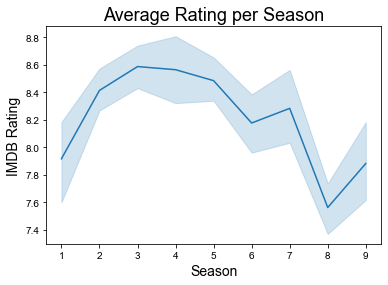

In [14]:
ax = sns.lineplot(df_ratings.season, df_ratings.rating)
ax.set_ylabel('IMDB Rating', fontsize=14)
ax.set_xlabel('Season', fontsize=14)
ax.set_title(f"Average Rating per Season", fontsize=18)
sns.set(rc={'figure.figsize':(20,6)})

In [15]:
ax.get_figure().savefig('images/ratings_seasons.png')

We overall see the rating climb in seasons 1 and 2, then peak in seasons 3. Season 4 slightly decreases in the averageratings, yet has a much higher variance. Thus the quality between episodes themselves varies much more in this season. We see the decrease in ratings continue until season 7, where it climbs again, before a dramatic decline in season 8.

## Ratings by episode

In [16]:
# top 5 best and worst episodes

worst = df_ratings.sort_values("rating", axis=0)[:3]
best = df_ratings.sort_values("rating", axis=0)[-3:]

In [17]:
notable_episodes = {}

for index, row in worst.iterrows():
    notable_episodes[(index, row["rating"])] = row["title"]

for index, row in best.iterrows():
    notable_episodes[(index, row["rating"])] = row["title"]

[]

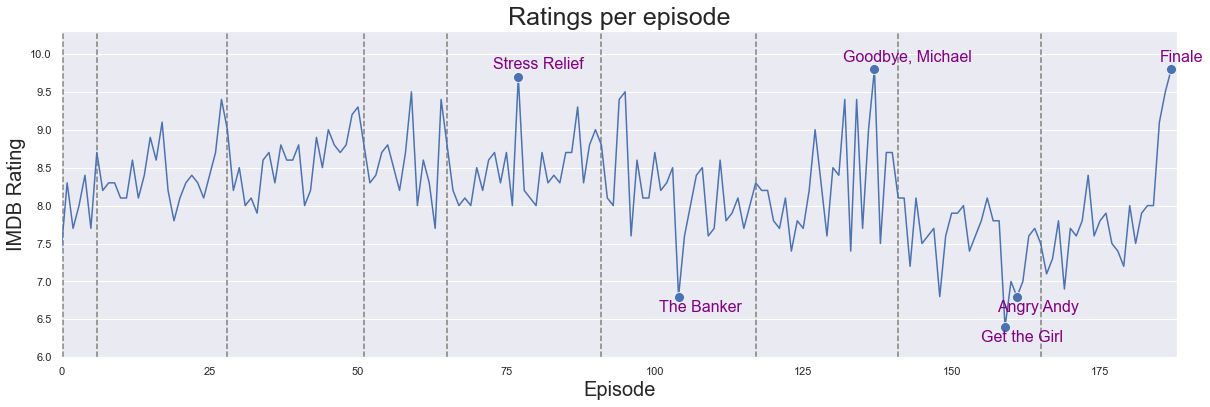

In [18]:
import seaborn as sns; 

sns.set(rc={'figure.figsize':(20,6)})
season_change = [i+1 for i in range(len(df_ratings)-1) if df_ratings.season[i] != df_ratings.season[i+1]]
palette = iter(sns.color_palette("Paired", max(df_ratings.season)))

# season 1
plt.axvline(x=0.3, color = "grey", linestyle='dashed', label="Season 1")

# seasons 2 - 8
for i, season in enumerate(season_change):
    plt.axvline(x=season, color = "grey", linestyle='dashed', label= f"Season {i+2}")


markers_on = [x for x,y in notable_episodes.keys()]

ax = sns.lineplot(data = df_ratings.rating, marker = '.', markersize=20, markevery=markers_on, legend=None)
ax.set_ylabel('IMDB Rating', fontsize=20)
ax.set_xlabel('Episode', fontsize=20)
ax.set_title(f"Ratings per episode", fontsize=25)
ax.xaxis.grid(False)
sns.set(rc={'figure.figsize':(10,5)})
plt.xlim(0, len(df_ratings))
plt.ylim(6, 10.3)

for data, title in notable_episodes.items():
    x = data[0] - len(title)/3
    if data[1] < 8.0:
        y = data[1] - 0.2
    else:
        y = data[1] + 0.1


    plt.text(x, y, title, color = "purple", fontsize=16)

ax.plot()

In [19]:
ax.get_figure().savefig('images/ratings_episodes.png')

In [35]:
import plotly.graph_objects as go
import plotly 
import plotly.express as px

fig = px.line(df_ratings, x=[i+1 for i in range(len(df_ratings))], y="rating", hover_name="title")

fig.update_layout(
    title= "Interactive Ratings per Episode",
    xaxis_title="Episode",
    yaxis_title="Rating",
    autosize=False,
    margin=dict(
        l=1,#Adjust the margin of the figure
        r=1,#Adjust the margin of the figure
        b=1,#Adjust the margin of the figure
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)

fig.show()

In [36]:
plotly.offline.plot(fig, filename='images/ratings_per_ep.html')

'images/ratings_per_ep.html'

## Top 5

`Goodbye Michael`: This episode is the final episode to feature Michael Scott as the series's main character, and is regarded by many critics as the "series finale", as the series received much criticism for a decline in quality after Michael's departure. We can make the case that Michael was the true main character. After he leaves, we see that the ratings crumble and the show cannot recover.

In `Stress Relief`, Dwight stages a fire in the office to test the office's fire safety skills, but things go from bad to worse when Stanley suffers a heart attack, causing Michael to come up with ways to relieve stress in the office, including a comedic roast of himself. Meanwhile, Andy, Jim, and Pam watch an illegally downloaded movie at work guest-starring Jack Black, Jessica Alba and Cloris Leachman. [reference](https://en.wikipedia.org/wiki/Stress_Relief_(The_Office))

The chaotic cold open scene becomes one of the top fan favorite scenes from the entire show.

Both parts of `Stress Relief` originally aired together on February 1, 2009, immediately following NBC's broadcast of Super Bowl XLIII, and The Office writers and producers sought to attract newcomers to the series with the expected increase in viewership. It had 22.9 million viewers - making it one of the most viewed episode of The Office.

## Bottom 5

`Get The Girl` featured Andy driving across the country to Tallahassee to track down Erin. He tries to serenade her in an extremely cringy scene and just does quite a few rather absurd things in an attempt to win Erin's heart. The Andy-Erin relationship received a lot of criticism by fans. [reference](https://screenrant.com/the-office-worst-episodes-imdb/) 

Even the actress portraying Erin, Ellie Kemper, never thought Andy and Erin were a good match. "Is that terrible to say? I don’t know, I felt like Andy was a bit too childish. I don’t think he was ready to take care of Erin the way she needed to be. I think Erin was ready to take care of him, but I felt like it was uneven in that respect." [reference](https://www.cinemablend.com/television/2553336/why-the-offices-ellie-kemper-wasnt-exactly-a-fan-of-erin-and-andys-relationship)

Finally, this episode introduces yet another manager that didn't catch viewers - Nellie Bertram.

We also want to discuss the biggest outlier in the ratings: In `The Banker`, an investment banker comes to the office to speak with Toby, since the company has recently been bought out. This episode is just montages of previous episodes, with very little new content.